In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e1/sample_submission.csv
/kaggle/input/playground-series-s5e1/train.csv
/kaggle/input/playground-series-s5e1/test.csv


## Import Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
print("==== train data ====")
print(train.head())
test = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
print('\n')
print("==== test data ====")
print(test.head())

==== train data ====
   id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0


==== test data ====
       id        date country              store             product
0  230130  2017-01-01  Canada  Discount Stickers   Holographic Goose
1  230131  2017-01-01  Canada  Discount Stickers              Kaggle
2  230132  2017-01-01  Canada  Discount Stickers        Kaggle Tiers
3  230133  2017-01-01  Canada  Discount Stickers            Kerneler
4  230134  2017-01-01  Canada  Discount Stickers  Kerneler Dark Mode


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## Train data 
- check columns and their classes

In [4]:
train_cols = train.columns.to_list()
print(train_cols)

['id', 'date', 'country', 'store', 'product', 'num_sold']


Check for missing values

In [5]:
for i in train_cols:
    print(f'{i}:{train[i].isna().sum()}')

id:0
date:0
country:0
store:0
product:0
num_sold:8871


Unique values

In [6]:
for i in train_cols:
    print(f'{i}:{len(train[i].unique())}')

id:230130
date:2557
country:6
store:3
product:5
num_sold:4038


In [7]:
train.dtypes

id            int64
date         object
country      object
store        object
product      object
num_sold    float64
dtype: object

In [8]:
print(f'{train.country.unique()}')
print(f'{train.store.unique()}')
print(train['product'].unique())

['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']


## Test Data

In [9]:
test_cols = test.columns.to_list()
print(test_cols)

['id', 'date', 'country', 'store', 'product']


In [10]:
for i in test_cols:
    print(f'{i}:{test[i].isna().sum()}')

id:0
date:0
country:0
store:0
product:0


In [11]:
for i in test_cols:
    print(f'{i}:{len(test[i].unique())}')

id:98550
date:1095
country:6
store:3
product:5


In [12]:
print(f'{test.country.unique()}')
print(f'{test.store.unique()}')
print(test['product'].unique())

['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']


In [13]:
test.dtypes

id          int64
date       object
country    object
store      object
product    object
dtype: object

## Preprocessing : Train

In [14]:
train_preprocess = train.copy()

In [15]:
train_preprocess['date'] = pd.to_datetime(train_preprocess['date'].to_list())

In [16]:
train_preprocess.dtypes

id                   int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold           float64
dtype: object

In [17]:
train_preprocess.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


Encoding
> country:6
> 
> store:3
> 
> product:5


In [18]:
from sklearn import preprocessing

label_encoder_country = preprocessing.LabelEncoder()
train_preprocess['country']= label_encoder_country.fit_transform(train_preprocess['country'])

In [19]:
label_encoder_store = preprocessing.LabelEncoder()
train_preprocess['store']= label_encoder_store.fit_transform(train_preprocess['store'])

In [20]:
label_encoder_product = preprocessing.LabelEncoder()
train_preprocess['product']= label_encoder_product.fit_transform(train_preprocess['product'])

In [21]:
train_preprocess

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,0,0,0,NaN
1,1,2010-01-01,0,0,1,973.0
2,2,2010-01-01,0,0,2,906.0
3,3,2010-01-01,0,0,3,423.0
4,4,2010-01-01,0,0,4,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,5,1,0,466.0
230126,230126,2016-12-31,5,1,1,2907.0
230127,230127,2016-12-31,5,1,2,2299.0
230128,230128,2016-12-31,5,1,3,1242.0


Handle Missing Values

In [22]:
train_preprocess.num_sold.isna().sum()

8871

In [23]:
train_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        230130 non-null  int64         
 1   date      230130 non-null  datetime64[ns]
 2   country   230130 non-null  int64         
 3   store     230130 non-null  int64         
 4   product   230130 non-null  int64         
 5   num_sold  221259 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 10.5 MB


In [24]:
print(train_preprocess['date'][0])
print(train['date'][0])

2010-01-01 00:00:00
2010-01-01


In [25]:
#train_preprocess['date'][0]
train_preprocess['date'] = pd.to_datetime(train_preprocess['date']).dt.date

In [26]:
print(train_preprocess['date'][0])

2010-01-01


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

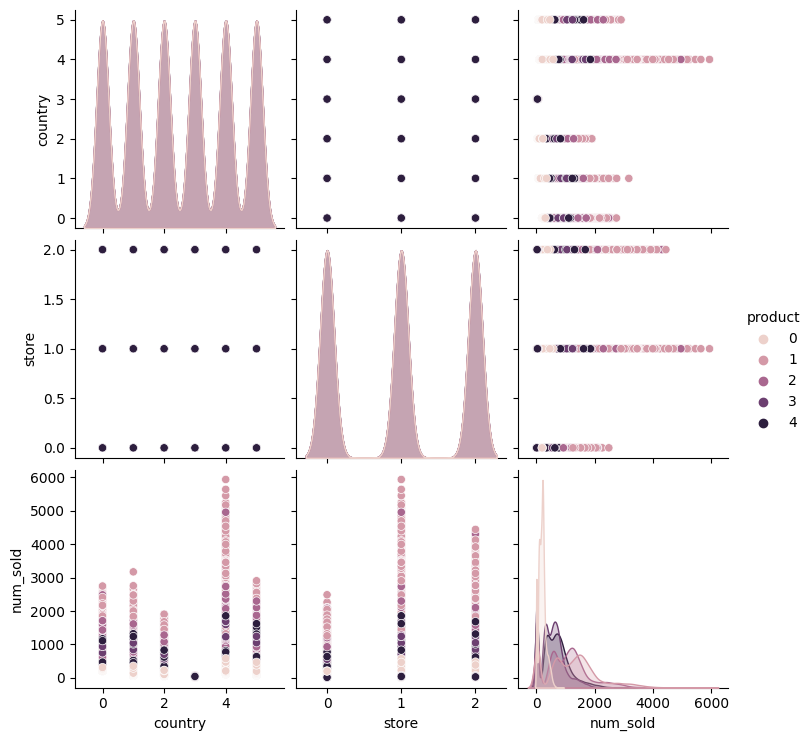

In [27]:
figsize=(24, 16)
sns.pairplot(train_preprocess.drop("id", axis=1), hue='product');

### Pre-processing pipeline

In [28]:
from sklearn import preprocessing

def preprocess_pipeline(train, test):
    train_dataframe = train.copy()
    test_dataframe = test.copy()

    # Label encoding for categorical columns
    label_encoder_country = preprocessing.LabelEncoder()
    label_encoder_store = preprocessing.LabelEncoder()
    label_encoder_product = preprocessing.LabelEncoder()

    train_dataframe['country'] = label_encoder_country.fit_transform(train_dataframe['country'])
    train_dataframe['store'] = label_encoder_store.fit_transform(train_dataframe['store'])
    train_dataframe['product'] = label_encoder_product.fit_transform(train_dataframe['product'])

    # Ensure date column is in datetime format
    train_dataframe['date'] = pd.to_datetime(train_dataframe['date'])
    
    # Extract date features
    train_dataframe['year'] = train_dataframe['date'].dt.year
    train_dataframe['month'] = train_dataframe['date'].dt.month
    train_dataframe['day'] = train_dataframe['date'].dt.day
    train_dataframe['day_of_week'] = train_dataframe['date'].dt.dayofweek

    # Drop the original date column
    train_dataframe = train_dataframe.drop('date', axis=1)
    
    # Drop NaN values
    train_dataframe = train_dataframe.dropna()

    # Apply the same transformations to test data
    test_dataframe['country'] = label_encoder_country.transform(test_dataframe['country'])
    test_dataframe['store'] = label_encoder_store.transform(test_dataframe['store'])
    test_dataframe['product'] = label_encoder_product.transform(test_dataframe['product'])

    test_dataframe['date'] = pd.to_datetime(test_dataframe['date'])
    test_dataframe['year'] = test_dataframe['date'].dt.year
    test_dataframe['month'] = test_dataframe['date'].dt.month
    test_dataframe['day'] = test_dataframe['date'].dt.day
    test_dataframe['day_of_week'] = test_dataframe['date'].dt.dayofweek

    test_dataframe = test_dataframe.drop('date', axis=1)
    test_dataframe = test_dataframe.dropna()

    return train_dataframe, test_dataframe

In [29]:
train_preprocessed,test_preprocessed = preprocess_pipeline(train,test)

In [30]:
train_preprocessed.head()

,id,country,store,product,num_sold,year,month,day,day_of_week
1,1,0,0,1,973.0,2010,1,1,4
2,2,0,0,2,906.0,2010,1,1,4
3,3,0,0,3,423.0,2010,1,1,4
4,4,0,0,4,491.0,2010,1,1,4
5,5,0,2,0,300.0,2010,1,1,4


In [31]:
test_preprocessed.head()

,id,country,store,product,year,month,day,day_of_week
0,230130,0,0,0,2017,1,1,6
1,230131,0,0,1,2017,1,1,6
2,230132,0,0,2,2017,1,1,6
3,230133,0,0,3,2017,1,1,6
4,230134,0,0,4,2017,1,1,6


In [32]:
# fig, axes = plt.subplots(2, 3, figsize=(12, 8))
# axes = axes.flatten()
# for i in range(6):
#     ax = axes[i]  # Get the current subplot axis
#     sns.lineplot(x="month", y="num_sold", data=test_preprocessed[test_preprocessed['country'] == i], ax=ax)
#     ax.set_title(f"Country {i}") #set title for each subplot
#     ax.set_xlabel("Month") #set x label for each subplot
#     ax.set_ylabel("Num Sold") #set y label for each subplot

In [33]:
# fig, axes = plt.subplots(2, 3, figsize=(24, 16))
# axes = axes.flatten()
# for i in range(6):
#     ax = axes[i]  # Get the current subplot axis
#     sns.lineplot(x="year", y="num_sold",hue="product", data=train_preprocess[train_preprocess['country'] == i], ax=ax)
#     ax.grid()
#     ax.set_title(f"Country {i}") #set title for each subplot
#     ax.set_xlabel("Year") #set x label for each subplot
#     ax.set_ylabel("Num Sold") #set y label for each subplot

In [34]:
# ## Correlation score
# from scipy.stats import f_oneway

# corr, _ = f_oneway (train_preprocess['country'], train_preprocess['num_sold'])
# corr

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='day_of_week', ylabel='num_sold'>

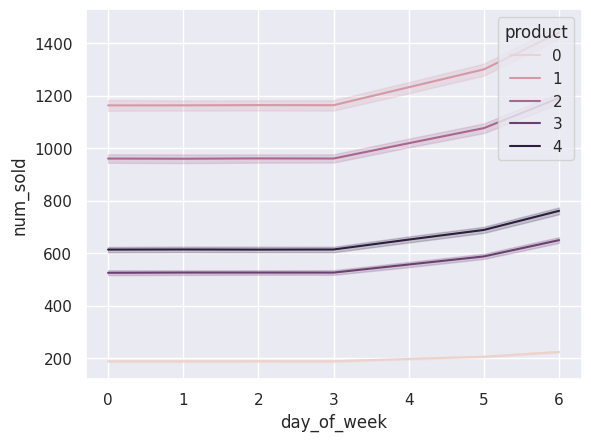

In [35]:
sns.set_theme()
# plt.(train_preprocess['day_of_week'],train_preprocess['num_sold'],bins=5)
sns.lineplot(x="day_of_week", y="num_sold",hue="product", data=train_preprocessed)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='day_of_week', ylabel='num_sold'>

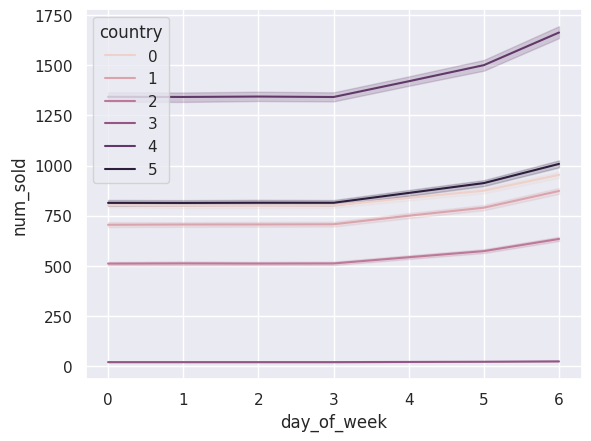

In [36]:
sns.lineplot(x="day_of_week", y="num_sold",hue="country", data=train_preprocessed)

In [37]:
train_preprocessed

,id,country,store,product,num_sold,year,month,day,day_of_week
1,1,0,0,1,973.0,2010,1,1,4
2,2,0,0,2,906.0,2010,1,1,4
3,3,0,0,3,423.0,2010,1,1,4
4,4,0,0,4,491.0,2010,1,1,4
5,5,0,2,0,300.0,2010,1,1,4
...,...,...,...,...,...,...,...,...,...
230125,230125,5,1,0,466.0,2016,12,31,5
230126,230126,5,1,1,2907.0,2016,12,31,5
230127,230127,5,1,2,2299.0,2016,12,31,5
230128,230128,5,1,3,1242.0,2016,12,31,5


In [38]:
from sklearn.model_selection import train_test_split
y = train_preprocessed.num_sold
X = train_preprocessed.drop(['num_sold'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=4234201)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((165944, 8), (55315, 8), (165944,), (55315,))

In [39]:
X_train

,id,country,store,product,year,month,day,day_of_week
102114,102114,3,2,4,2013,2,8,4
178186,178186,5,0,1,2015,6,3,2
53102,53102,0,0,2,2011,8,14,6
9001,9001,0,0,1,2010,4,11,6
124050,124050,2,0,0,2013,10,10,3
...,...,...,...,...,...,...,...,...
176889,176889,2,2,4,2015,5,20,2
211620,211620,2,0,0,2016,6,9,3
63549,63549,0,2,4,2011,12,8,3
117051,117051,3,2,1,2013,7,24,2


### Apply Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X_train, y_train), lin_reg.score(X_test, y_test)

(0.08153985891832594, 0.0814592465656353)

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
    PolynomialFeatures(2), LinearRegression()
)
pipe.fit(X_train, y_train).score(X_test, y_test)

0.33178413599198087

In [42]:
preds = pipe.predict(test_preprocessed)

In [43]:
len(preds),len(test_preprocessed)

(98550, 98550)

Create DataFrame

In [44]:
results = pd.DataFrame()

In [45]:
results['id'] = test_preprocessed.id

In [46]:
results['num_sold'] = preds

In [47]:
results

,id,num_sold
0,230130,139.260333
1,230131,623.738513
2,230132,803.976305
3,230133,679.973711
4,230134,251.730730
...,...,...
98545,328675,573.452817
98546,328676,1052.680834
98547,328677,1227.668465
98548,328678,1098.415709


In [48]:
results.to_csv("result_01.csv")

### Apply UMAP

In [49]:
try:
    import umap
except:
    !pip install umap
    import umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=b4f0368e481df0903041f8910562c2e772b8821cadfd1ee656871341fd3fac5d
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
